In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cp

This notebook provides code for plotting the mean-variance tradeoff while trading on a noncomposable hook. Given a deterministic output function $G_1(\Delta)$ for a CFMM and a noncomposable hook with mean output $G_2(\Delta)$ and variance $\sigma^2(\Delta)$, we solve the problem:

\begin{align*}
\text{maximize} \quad & G_1(\Delta) + G_2(100- \Delta) - \lambda \sigma^2(\Delta),
\end{align*}
where the user is interested in trading $100$ units and has a tradeoff parameter $\lambda>0$. We solve this using CVX for $G_1(\Delta) = \log(\Delta + 1)$ and $G_2(\Delta) = \sqrt{\Delta}$, and for $\sigma^2(\Delta) = c$, $\sigma^2(\Delta) = k \Delta$, and $\sigma^2(\Delta) = k \Delta^2$. 

We plot the optimal objective value vs. $k$ below.

In [3]:
# Define output functions or `mean returns'
def G1(x):
    return np.log(x + 1) 

def G2(x):
    return np.sqrt(x)

# Define variance functions
def sigma_squared_linear(delta, k):
    return k * delta

def sigma_squared_quadratic(delta, k):
    return k * delta**2

def sigma_squared_constant(sigma):
    return sigma**2

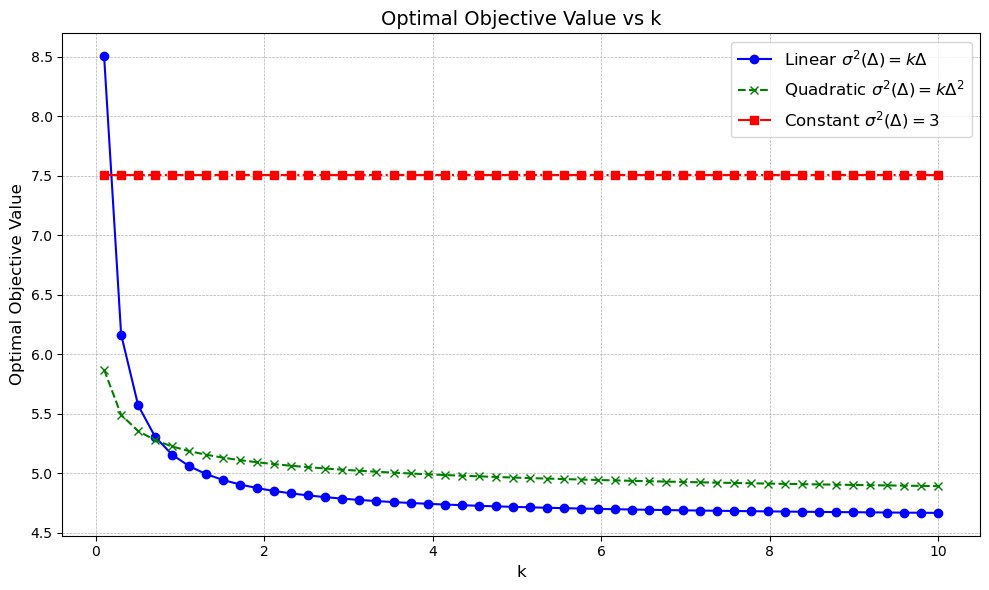

In [9]:
lambda_param = 0.5 # Lambda, tradeoff between mean and variance
k_values = np.linspace(0.1, 10, 50)  # Range of k values
constant_sigma = 3  # Constant variance

optimal_values_linear = []
optimal_values_quadratic = []
optimal_values_constant = []

# Perform simulation for linear variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_linear(delta, k))
    G1_term = cp.log(100 - delta + 1)
    G2_term = cp.sqrt(delta)
    penalty_term = lambda_param * sigma_squared_linear(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 0, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()

    optimal_values_linear.append(prob.value)

# Perform simulation for quadratic variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_quadratic(delta, k))
    G1_term = cp.log(100 - delta + 1)
    G2_term = cp.sqrt(delta)
    penalty_term = lambda_param * sigma_squared_quadratic(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 0, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_quadratic.append(prob.value)

# Perform simulation for constant variance
delta = cp.Variable()
sigma = constant_sigma
G1_term = cp.log(100 - delta + 1)
G2_term = cp.sqrt(delta)
penalty_term = lambda_param * sigma_squared_constant(sigma)

objective = cp.Maximize(G1_term + G2_term - penalty_term)
constraints = [delta >= 0, delta <= 100]

prob = cp.Problem(objective, constraints)
prob.solve()

optimal_value_constant = prob.value

optimal_values_constant = [optimal_value_constant] * len(k_values)

# Plotting the results
plt.figure(figsize=(10, 6))

plt.plot(k_values, optimal_values_linear, marker='o', color='blue', linestyle='-', label='Linear $\sigma^2(\Delta) = k\Delta$')
plt.plot(k_values, optimal_values_quadratic, marker='x', color='green', linestyle='--', label='Quadratic $\sigma^2(\Delta) = k\Delta^2$')
plt.plot(k_values, optimal_values_constant, marker='s', color='red', linestyle='-.', label='Constant $\sigma^2(\Delta) = 3$')

plt.xlabel('k', fontsize=12)
plt.ylabel('Optimal Objective Value', fontsize=12)
plt.title('Optimal Objective Value vs k', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.tight_layout()
plt.savefig('figures/optimal_objective_value_vs_k.png', dpi=500)
plt.show()

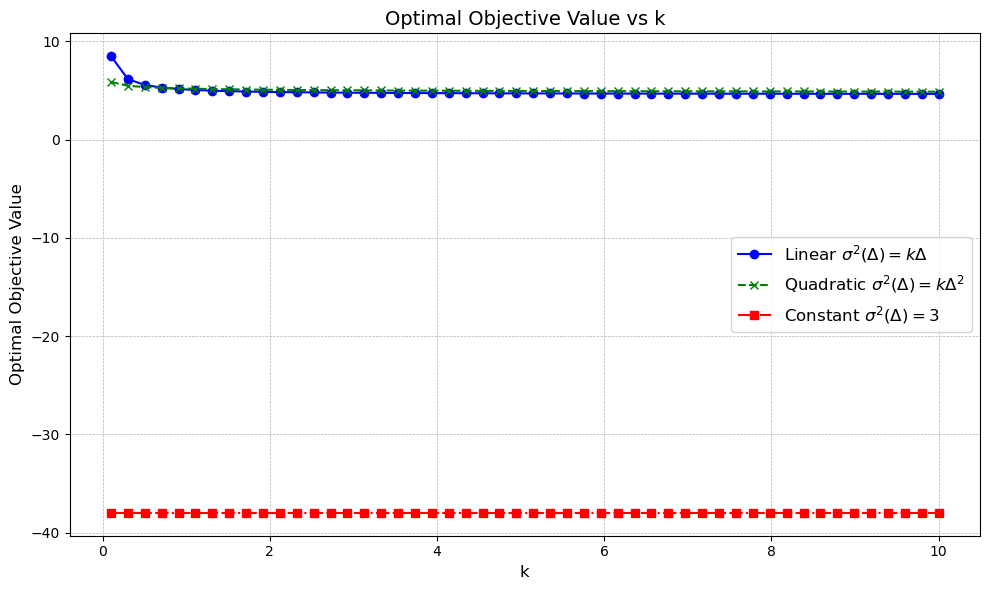

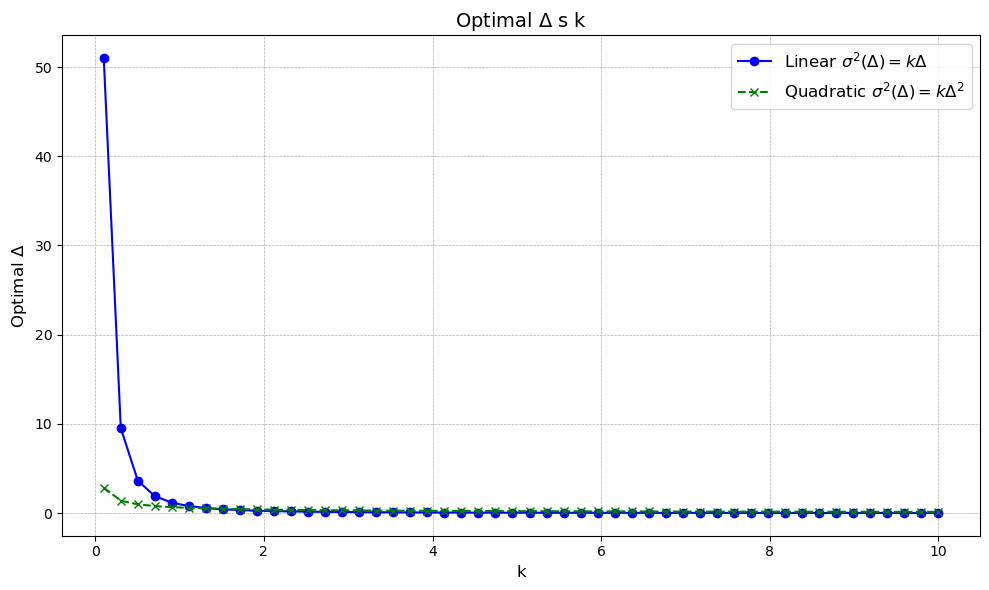

In [12]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

# Define the sigma squared functions
def sigma_squared_linear(delta, k):
    return k * delta

def sigma_squared_quadratic(delta, k):
    return k * delta**2

def sigma_squared_constant(sigma):
    return sigma**2

# Parameters
lambda_param = 0.5  # Lambda, tradeoff between mean and variance
k_values = np.linspace(0.1, 10, 50)  # Range of k values
constant_sigma = 10  # Constant variance

optimal_values_linear = []
optimal_values_quadratic = []
optimal_values_constant = []

optimal_delta_linear = []
optimal_delta_quadratic = []
optimal_delta_constant = []

# Perform simulation for linear variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_linear(delta, k))
    G1_term = cp.log(100 - delta + 1)
    G2_term = cp.sqrt(delta)
    penalty_term = lambda_param * sigma_squared_linear(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 0, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_linear.append(prob.value)
    optimal_delta_linear.append(delta.value)

# Perform simulation for quadratic variance
for k in k_values:
    delta = cp.Variable()
    sigma = cp.sqrt(sigma_squared_quadratic(delta, k))
    G1_term = cp.log(100 - delta + 1)
    G2_term = cp.sqrt(delta)
    penalty_term = lambda_param * sigma_squared_quadratic(delta, k)
    
    objective = cp.Maximize(G1_term + G2_term - penalty_term)
    constraints = [delta >= 0, delta <= 100]
    
    prob = cp.Problem(objective, constraints)
    prob.solve()
    
    optimal_values_quadratic.append(prob.value)
    optimal_delta_quadratic.append(delta.value)

# Perform simulation for constant variance
delta = cp.Variable()
sigma = constant_sigma
G1_term = cp.log(100 - delta + 1)
G2_term = cp.sqrt(delta)
penalty_term = lambda_param * sigma_squared_constant(sigma)

objective = cp.Maximize(G1_term + G2_term - penalty_term)
constraints = [delta >= 0, delta <= 100]

prob = cp.Problem(objective, constraints)
prob.solve()

optimal_value_constant = prob.value
optimal_delta_constant_value = delta.value

optimal_values_constant = [optimal_value_constant] * len(k_values)
optimal_delta_constant = [optimal_delta_constant_value] * len(k_values)

# Plotting the results for optimal values
plt.figure(figsize=(10, 6))
plt.plot(k_values, optimal_values_linear, marker='o', color='blue', linestyle='-', label='Linear $\sigma^2(\Delta) = k\Delta$')
plt.plot(k_values, optimal_values_quadratic, marker='x', color='green', linestyle='--', label='Quadratic $\sigma^2(\Delta) = k\Delta^2$')
plt.plot(k_values, optimal_values_constant, marker='s', color='red', linestyle='-.', label='Constant $\sigma^2(\Delta) = 3$')
plt.xlabel('k', fontsize=12)
plt.ylabel('Optimal Objective Value', fontsize=12)
plt.title('Optimal Objective Value vs k', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('figures/optimal_objective_value_vs_k.png', dpi=500)
plt.show()

# Plotting the results for optimal delta
plt.figure(figsize=(10, 6))
plt.plot(k_values, optimal_delta_linear, marker='o', color='blue', linestyle='-', label='Linear $\sigma^2(\Delta) = k\Delta$')
plt.plot(k_values, optimal_delta_quadratic, marker='x', color='green', linestyle='--', label='Quadratic $\sigma^2(\Delta) = k\Delta^2$')
#plt.plot(k_values, optimal_delta_constant, marker='s', color='red', linestyle='-.', label='Constant $\sigma^2(\Delta) = 3$')
plt.xlabel('k', fontsize=12)
plt.ylabel('Optimal $\Delta$', fontsize=12)
plt.title('Optimal $\Delta$ s k', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.savefig('figures/optimal_delta_vs_k.png', dpi=500)
plt.show()


In [13]:
optimal_delta_linear

[array(51.01131675),
 array(9.53173598),
 array(3.6331633),
 array(1.89565027),
 array(1.16067627),
 array(0.78290796),
 array(0.56344353),
 array(0.42487274),
 array(0.33175083),
 array(0.26621125),
 array(0.21828935),
 array(0.18222975),
 array(0.15444509),
 array(0.13256956),
 array(0.11500635),
 array(0.10075153),
 array(0.08897336),
 array(0.07914622),
 array(0.07086163),
 array(0.06381333),
 array(0.0577666),
 array(0.0525374),
 array(0.04799171),
 array(0.04400739),
 array(0.04050261),
 array(0.03739505),
 array(0.03463769),
 array(0.03217156),
 array(0.02996002),
 array(0.02796752),
 array(0.0261714),
 array(0.02453727),
 array(0.02305842),
 array(0.02170618),
 array(0.02046943),
 array(0.01933523),
 array(0.01828851),
 array(0.01732971),
 array(0.01644478),
 array(0.01562407),
 array(0.01486252),
 array(0.01415621),
 array(0.01349603),
 array(0.01288347),
 array(0.01231782),
 array(0.01178325),
 array(0.0112824),
 array(0.01081087),
 array(0.01037129),
 array(0.00995796)]

In [14]:
optimal_delta_quadratic

[array(2.85516916),
 array(1.3769861),
 array(0.98169118),
 array(0.78522923),
 array(0.66457071),
 array(0.58156987),
 array(0.52051696),
 array(0.47333594),
 array(0.43558466),
 array(0.40461955),
 array(0.37857575),
 array(0.35620277),
 array(0.33695276),
 array(0.32017934),
 array(0.30537048),
 array(0.29214185),
 array(0.28025341),
 array(0.26946806),
 array(0.25964717),
 array(0.25082683),
 array(0.2427064),
 array(0.23515554),
 array(0.22815773),
 array(0.22165955),
 array(0.21560616),
 array(0.20994957),
 array(0.20464923),
 array(0.19967058),
 array(0.19498353),
 array(0.19056353),
 array(0.18638515),
 array(0.18242799),
 array(0.17867383),
 array(0.17510606),
 array(0.17171105),
 array(0.16847588),
 array(0.16538895),
 array(0.16243972),
 array(0.15961867),
 array(0.15691713),
 array(0.15432722),
 array(0.15184175),
 array(0.14945415),
 array(0.1471584),
 array(0.14494896),
 array(0.14282063),
 array(0.14076888),
 array(0.13878937),
 array(0.13687812),
 array(0.13503145)]